### 무게를 찾기
- 목 표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
DATA = '../Data/fish.csv'

In [97]:
fishDF=pd.read_csv(DATA, usecols=[0,1,2])
fishDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [98]:
PerchDF = fishDF[fishDF.Species == 'Perch']
PerchDF.head(2)

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7


In [99]:
PerchDF=PerchDF.drop(['Species'], axis=1).copy()
PerchDF.head(2)

,Weight,Length
72,5.9,8.4
73,32.0,13.7


In [100]:
PerchDF.reset_index(drop=True, inplace=True)
PerchDF.head(2)

,Weight,Length
0,5.9,8.4
1,32.0,13.7


[1-1] 피쳐분석 ==> 상관계수값, 시각화 2가지 모두 고려

In [101]:
# 상관계수값
PerchDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


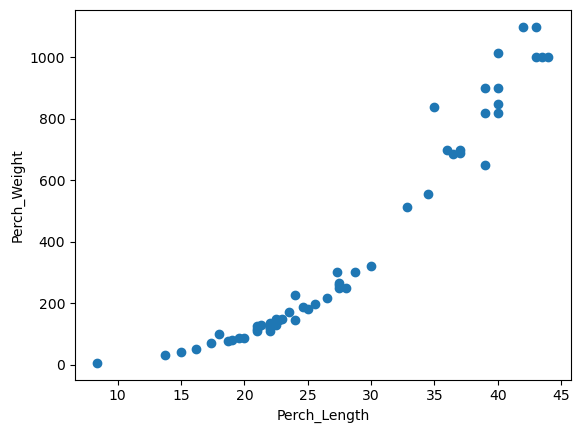

In [102]:
# 시각화
plt.scatter(PerchDF['Length'], PerchDF['Weight'])
plt.xlabel('Perch_Length')
plt.ylabel('Perch_Weight')
plt.show()

[2] 학습 준비
- 학습알고리즘 : KNN Regressor
- 피쳐 : 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [103]:
# 피쳐: Perch_Weight (2D) // 타겟: Perch_Length (1D)
features = PerchDF[['Length']]
target = PerchDF['Weight']

print(f'feature >> {features.shape}, {features.ndim}D')
print(f'target >> {target.shape}, {target.ndim}D')

feature >> (56, 1), 2D
target >> (56,), 1D


[2-2] 학습용/테스트용 데이터셋 분리
- 전체 데이터셋 => 학습용/테스트용 비율 (75:25[default], 80:20, 70:30, ...)
- 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율은 고려 X

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    train_size=0.8, # 또는 test_size=0.2
                                                    random_state=10)

In [106]:
# index 재지정
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

print(f'x_train:{x_train.shape}, {x_train.ndim}D')
print(f'y_train:{y_train.shape}, {y_train.ndim}D')

print(f'x_test:{x_test.shape}, {x_test.ndim}D')
print(f'y_test:{y_test.shape}, {y_test.ndim}D')

x_train:(44, 1), 2D
y_train:(44,), 1D
x_test:(12, 1), 2D
y_test:(12,), 1D


[2-3] 피쳐 스케일링

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [109]:
# 스케일러 데이터셋에 속성값 설정
mmScaler.fit(x_train)

MinMaxScaler()

In [110]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [111]:
# 학습용, 테스트용 데이터셋 스케일링
x_train_scaled = mmScaler.transform(x_train)
x_test_scaled = mmScaler.transform(x_test)

[3] 학습 진행

In [112]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [113]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 44, 'euclidean', {})

[4] 최적의 K 찾기

In [114]:
model.n_samples_fit_

44

In [115]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 개수 설정 => 모델 성능 좌우 : 하이퍼 파라미터(Hyper-Parameter)
    model.n_neighbors=k

    # 성능 평가
    score=model.score(x_test_scaled, y_test)
    scores[k]=score
scores

{1: 0.887859218278791,
 2: 0.8926103721490397,
 3: 0.9552977541783533,
 4: 0.9590224642568914,
 5: 0.9586447980338691,
 6: 0.9826358554119554,
 7: 0.9704549233411688,
 8: 0.9607957793936738,
 9: 0.9591849421382691,
 10: 0.9535197509515273,
 11: 0.9556733512563572,
 12: 0.9512260374222055,
 13: 0.9534533403897971,
 14: 0.9533084904073085,
 15: 0.9447418933327212,
 16: 0.9452920717215907,
 17: 0.9390524064380376,
 18: 0.9241894377899799,
 19: 0.9184721955860695,
 20: 0.9214363881547877,
 21: 0.9042481300375664,
 22: 0.9080813651745998,
 23: 0.886318501147965,
 24: 0.8607650729110133,
 25: 0.8481063957296819,
 26: 0.8388523256139375,
 27: 0.820583466132882,
 28: 0.7886490620316149,
 29: 0.7571036071583447,
 30: 0.7176252424348286,
 31: 0.6758976865690555,
 32: 0.6261639376756407,
 33: 0.5786965189532619,
 34: 0.5144710308650999,
 35: 0.45323283959523086,
 36: 0.3669514118521877,
 37: 0.26440075655520656,
 38: 0.18451508628922875,
 39: 0.12632659351245878,
 40: 0.0020560641667453083,
 41: 

In [116]:
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

6

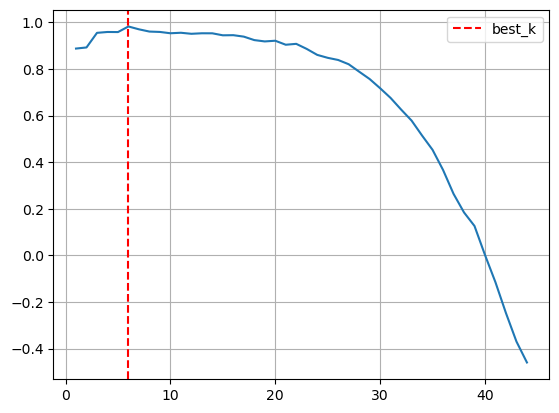

In [117]:
# k 그래프
plt.plot(list(scores.keys()), list(scores.values()))
plt.axvline(x=best_k, ymin=0, ymax=1, color='r', linestyle='--', label='best_k')
plt.grid()
plt.legend()
plt.show()

[5] 새로운 데이터의 무게 예측하기

In [118]:
new_length = '44'

In [119]:
# 2D 적용
dataDF = pd.DataFrame([[new_length]], columns=['Length'])
dataDF

,Length
0,44


In [120]:
# 피쳐 스케일링 적용
data_scaled = mmScaler.transform(dataDF)

In [121]:
# 예측
model.predict(data_scaled)

array([415.15681818])

### KNN Regressor 문제점/단점

In [122]:
# 임의의 데이터
new_length = 4

# 2D 적용
dataDF = pd.DataFrame([[new_length]], columns=['Length'])

# 피쳐 스케일링 적용
data_scaled = mmScaler.transform(dataDF)

# 예측
model.predict(data_scaled)

array([415.15681818])

=> 학습 데이터셋의 범위를 벗어나는 더 큰 데이터, 더 작은 데이터의 경우  
정확한 예측 불가!!